# Carregando Códigos e Metadados

In [58]:
import pandas as pd
import requests
import json

url = "http://www.ipeadata.gov.br/api/odata4/Metadados"
response = json.loads(requests.get(url).text)
data = response["value"]
index = pd.DataFrame(data)
index["PERNOME"].value_counts().to_frame().transpose()

,Mensal,Anual,Trimestral,Quadrienal,Decenal,Quinquenal,Diária,Não se aplica,Irregular
PERNOME,3520,3073,977,696,380,92,47,32,23


# Mostrando Valores para tabelas diárias e recentemente atualizadas

In [60]:
pd.set_option('display.max_colwidth', -1)

index["SERATUALIZACAO"] = pd.to_datetime(index["SERATUALIZACAO"], utc = True)
new_filter = index["SERATUALIZACAO"].gt(pd.to_datetime("2020-03-01T00:00:00-03:00", utc = True))
daily_filter = index["PERNOME"].eq("Diária")
index[new_filter & daily_filter].head()

/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,SERCODIGO,SERNOME,SERCOMENTARIO,SERATUALIZACAO,BASNOME,FNTSIGLA,FNTNOME,FNTURL,PERNOME,UNINOME,MULNOME,SERSTATUS,TEMCODIGO,PAICODIGO,SERNUMERICA
2646,SECEX366_MVTOT366,Importações - média semanal,"As importações são os valores das compras e outras entradas de mercadorias de propriedade de residentes no país, registrado na Balança Comercial do Balanço de Pagamentos. O valor FOB indica o preço da mercadoria em dólares americanos sob o Incoterm FOB (Free on Board), modalidade na qual o exportador é responsável por embarcar a mercadoria enquanto o importador assume o pagamento do frete, seguros e demais custos pós embarque. Considerou-se para este caso a importação referente ao volume total do país. Nota: Importação brasileira média por dia útil na semana de referência. Valores FOB divididos pelo número de dias úteis na semana. Mais informações: <a href= ""../doc/Manual_Versao_1_0.pdf "">Utilização dos dados estatísticos do comércio exterior brasileiro</a>.",2020-04-23 14:44:00.873000+00:00,Macroeconômico,MDIC/SECEX,"Ministério do Desenvolvimento, Indústria e Comércio Exterior-Secretaria de Comércio Exterior",www.mdic.gov.br,Diária,US$,milhões,A,5,BRA,True
2647,SECEX366_XVTOT366,Exportações - média semanal,"As exportações são os valores das vendas para o exterior e outras remessas de bens de propriedade de residentes no país, registrado na Balança Comercial do Balanço de Pagamentos. O valor FOB indica o preço da mercadoria em dólares americanos sob o Incoterm FOB (Free on Board), modalidade na qual o exportador é responsável por embarcar a mercadoria enquanto o importador assume o pagamento do frete, seguros e demais custos pós embarque. Considerou-se para este caso a exportação referente ao volume total do país. Nota: Exportação brasileira média por dia útil na semana de referência. Valores FOB divididos pelo número de dias úteis na semana. Mais informações: <a href= ""../doc/Manual_Versao_1_0.pdf "">Utilização dos dados estatísticos do comércio exterior brasileiro</a>.",2020-04-23 14:44:00.873000+00:00,Macroeconômico,MDIC/SECEX,"Ministério do Desenvolvimento, Indústria e Comércio Exterior-Secretaria de Comércio Exterior",www.mdic.gov.br,Diária,US$,milhões,A,5,BRA,True
3970,BM366_MCC366,Câmbio contratado - operações com clientes no segmento comercial - importação,Quadro: Câmbio contratado. Obs.: Refere-se ao segmento livre de câmbio. Representa o somatório das contratações de venda de moeda estrangeira efetuadas pelos bancos comerciais ao mercado não financeiro relativas a importações de bens.,2020-04-22 18:12:01.450000+00:00,Macroeconômico,Bacen/Boletim/BP,"Banco Central do Brasil, Boletim, Seção Balanço de Pagamentos (Bacen / Boletim / BP)",www.bcb.gov.br,Diária,US$,milhões,A,7,BRA,True
3971,BM366_SBCCC366,Câmbio contratado - operações com clientes no segmento comercial,Quadro: Câmbio contratado. Obs.: Refere-se ao segmento livre de câmbio. Representa o resultado líquido de contratações de câmbio comercial de exportação e de importação.,2020-04-22 18:12:01.450000+00:00,Macroeconômico,Bacen/Boletim/BP,"Banco Central do Brasil, Boletim, Seção Balanço de Pagamentos (Bacen / Boletim / BP)",www.bcb.gov.br,Diária,US$,milhões,A,7,BRA,True
3972,BM366_XCC366,Câmbio contratado - operações com clientes no segmento comercial - exportação,Quadro: Câmbio contratado. Obs.: Refere-se ao segmento livre de câmbio. Representa o somatório das contratações de compra de moeda estrangeira efetuadas pelos bancos comerciais junto ao mercado não financeiro relativas a exportações de bens.,2020-04-22 18:12:01.450000+00:00,Macroeconômico,Bacen/Boletim/BP,"Banco Central do Brasil, Boletim, Seção Balanço de Pagamentos (Bacen / Boletim / BP)",www.bcb.gov.br,Diária,US$,milhões,A,7,BRA,True


# Escolha um código e faça a extração para a pasta [DATA]

,SERCODIGO,VALDATA,VALVALOR,NIVNOME,TERCODIGO
0,GM366_TJOVERV366,1986-07-02T00:00:00-03:00,0.001819,,
1,GM366_TJOVERV366,1986-07-03T00:00:00-03:00,0.004332,,
2,GM366_TJOVERV366,1986-07-04T00:00:00-03:00,0.009892,,
3,GM366_TJOVERV366,1986-07-07T00:00:00-03:00,0.013051,,
4,GM366_TJOVERV366,1986-07-08T00:00:00-03:00,0.015322,,


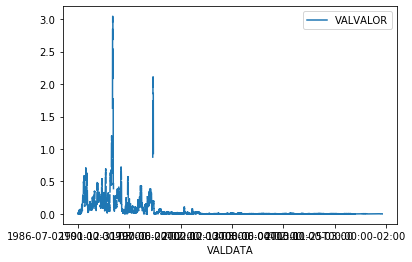

In [30]:
serCodigo = "GM366_TJOVERV366"
url = "http://www.ipeadata.gov.br/api/odata4/Metadados('{id}')/Valores".format(id = serCodigo)
response = json.loads(requests.get(url).text)
data = response["value"]
df = pd.DataFrame(data)
df.to_csv("/home/ubuntu/notebooks/covid-prj01-data-analysis/[DATA]/{}.csv".format(serCodigo))
display(df.head())
df.set_index("VALDATA").plot()